# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


# Importing Dataset

In [3]:

df = pd.read_csv('prediction.csv')
df.head(7000)

Source.Name        Date          Open          High           Low  \
0       Adanient  01-01-2016     45.553741     49.422543     44.872616   
1       Adanient  04-01-2016     48.768658     50.158157     45.907928   
2       Adanient  05-01-2016     46.670792     48.823151     45.880684   
3       Adanient  06-01-2016     47.951309     48.468964     46.480076   
4       Adanient  07-01-2016     46.262115     46.262115     42.502296   
...          ...         ...           ...           ...           ...   
6995     Samsung  15-04-2022  67200.000000  67300.000000  66500.000000   
6996     Samsung  18-04-2022  66500.000000  67100.000000  66100.000000   
6997     Samsung  19-04-2022  67100.000000  68000.000000  67000.000000   
6998     Samsung  20-04-2022  67000.000000  67400.000000  66500.000000   
6999     Samsung  21-04-2022  67600.000000  68300.000000  67500.000000   

             Close     Adj Close      Volume  
0        49.095600     47.614208  10963906.0  
1        46.371094     44.971912   9408965.0  
2        48.278248     46.821522   9801814.0  
3        46.997730     45.579639   7093448.0  
4        43.564854     42.250347   8919023.0  
...            ...           ...         ...  
6995  66600.000000  66195.242190  13176415.0  
6996  66700.000000  66294.632810  10119203.0  
6997  67300.000000  66890.984380  12959434.0  
6998  67400.000000  66990.375000  16693293.0  
6999  67700.000000  67288.554690  12847448.0  

[7000 rows x 8 columns]

In [4]:
df.shape


(7104, 8)

In [5]:
df.describe()


Open          High           Low         Close     Adj Close  \
count   7103.000000   7103.000000   7103.000000   7103.000000   7103.000000   
mean    8432.732226   8513.176982   8351.425214   8429.914883   8093.643163   
std    21222.118718  21408.690545  21030.114669  21208.162772  20445.132242   
min       19.000000     25.000000     17.540001     23.889999     23.889999   
25%       19.000000     25.000000     17.540001     23.889999     23.889999   
50%      312.899994    317.880005    306.600006    313.359985    313.299988   
75%     1223.924988   1240.000000   1204.799988   1224.099976   1215.563721   
max    90300.000000  96800.000000  89500.000000  91000.000000  88367.843750   

             Volume  
count  7.103000e+03  
mean   1.258886e+07  
std    8.646773e+06  
min    0.000000e+00  
25%    5.494580e+06  
50%    1.174158e+07  
75%    1.876630e+07  
max    1.701502e+08

In [6]:
df.describe()


Open          High           Low         Close     Adj Close  \
count   7103.000000   7103.000000   7103.000000   7103.000000   7103.000000   
mean    8432.732226   8513.176982   8351.425214   8429.914883   8093.643163   
std    21222.118718  21408.690545  21030.114669  21208.162772  20445.132242   
min       19.000000     25.000000     17.540001     23.889999     23.889999   
25%       19.000000     25.000000     17.540001     23.889999     23.889999   
50%      312.899994    317.880005    306.600006    313.359985    313.299988   
75%     1223.924988   1240.000000   1204.799988   1224.099976   1215.563721   
max    90300.000000  96800.000000  89500.000000  91000.000000  88367.843750   

             Volume  
count  7.103000e+03  
mean   1.258886e+07  
std    8.646773e+06  
min    0.000000e+00  
25%    5.494580e+06  
50%    1.174158e+07  
75%    1.876630e+07  
max    1.701502e+08

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source.Name  7104 non-null   object 
 1   Date         7104 non-null   object 
 2   Open         7103 non-null   float64
 3   High         7103 non-null   float64
 4   Low          7103 non-null   float64
 5   Close        7103 non-null   float64
 6   Adj Close    7103 non-null   float64
 7   Volume       7103 non-null   float64
dtypes: float64(6), object(2)
memory usage: 444.1+ KB


# Exploratory Data Analysis

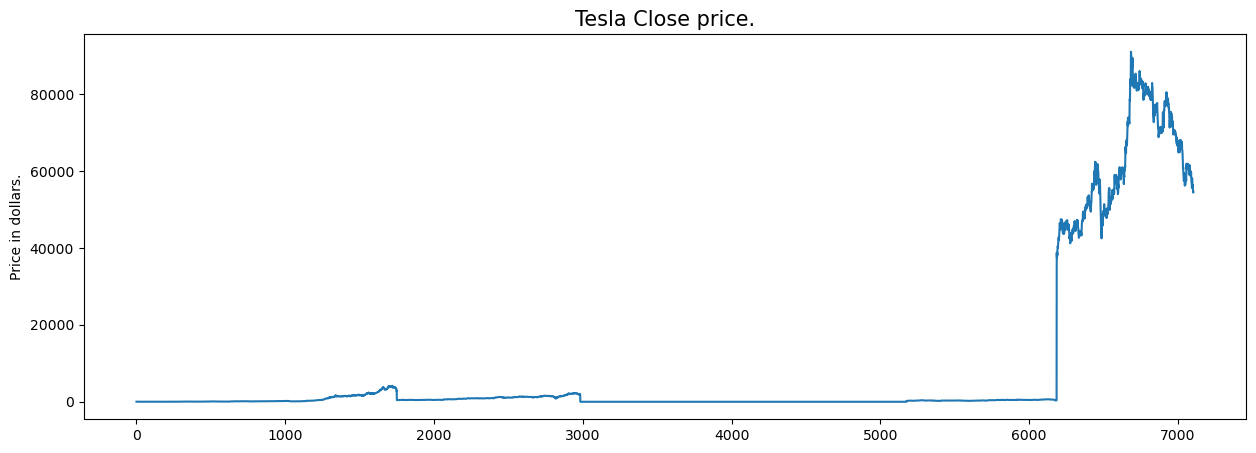

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [9]:
df.head(7000)


Source.Name        Date          Open          High           Low  \
0       Adanient  01-01-2016     45.553741     49.422543     44.872616   
1       Adanient  04-01-2016     48.768658     50.158157     45.907928   
2       Adanient  05-01-2016     46.670792     48.823151     45.880684   
3       Adanient  06-01-2016     47.951309     48.468964     46.480076   
4       Adanient  07-01-2016     46.262115     46.262115     42.502296   
...          ...         ...           ...           ...           ...   
6995     Samsung  15-04-2022  67200.000000  67300.000000  66500.000000   
6996     Samsung  18-04-2022  66500.000000  67100.000000  66100.000000   
6997     Samsung  19-04-2022  67100.000000  68000.000000  67000.000000   
6998     Samsung  20-04-2022  67000.000000  67400.000000  66500.000000   
6999     Samsung  21-04-2022  67600.000000  68300.000000  67500.000000   

             Close     Adj Close      Volume  
0        49.095600     47.614208  10963906.0  
1        46.371094     44.971912   9408965.0  
2        48.278248     46.821522   9801814.0  
3        46.997730     45.579639   7093448.0  
4        43.564854     42.250347   8919023.0  
...            ...           ...         ...  
6995  66600.000000  66195.242190  13176415.0  
6996  66700.000000  66294.632810  10119203.0  
6997  67300.000000  66890.984380  12959434.0  
6998  67400.000000  66990.375000  16693293.0  
6999  67700.000000  67288.554690  12847448.0  

[7000 rows x 8 columns]

In [10]:
df[df['Close'] == df['Adj Close']].shape


(3495, 8)

In [11]:
df = df.drop(['Adj Close'], axis=1)


In [12]:
df.isnull().sum()


Source.Name    0
Date           0
Open           1
High           1
Low            1
Close          1
Volume         1
dtype: int64

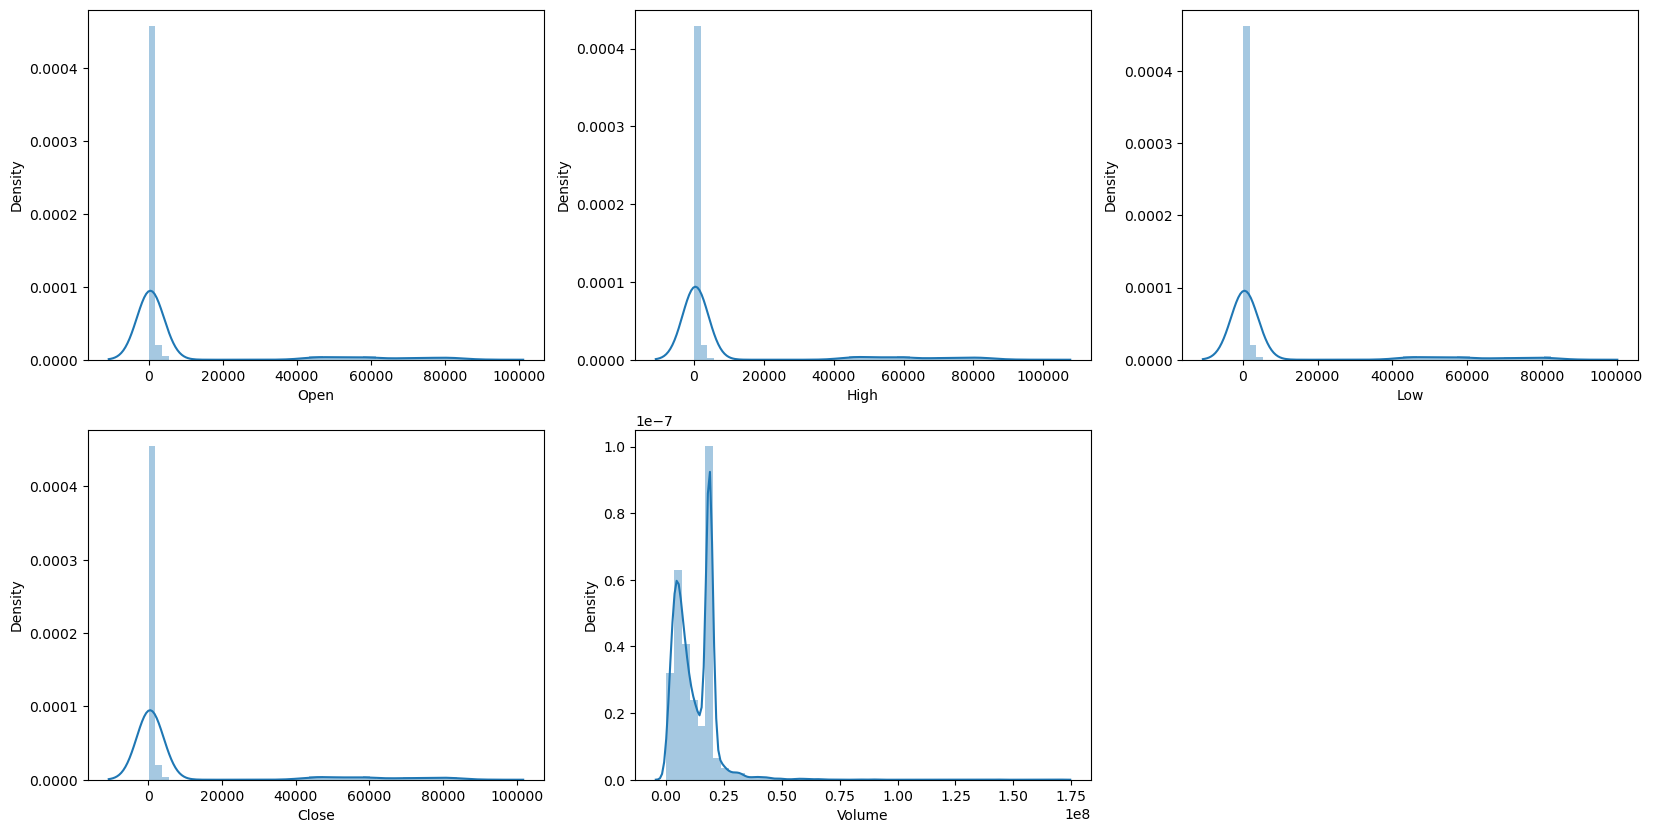

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


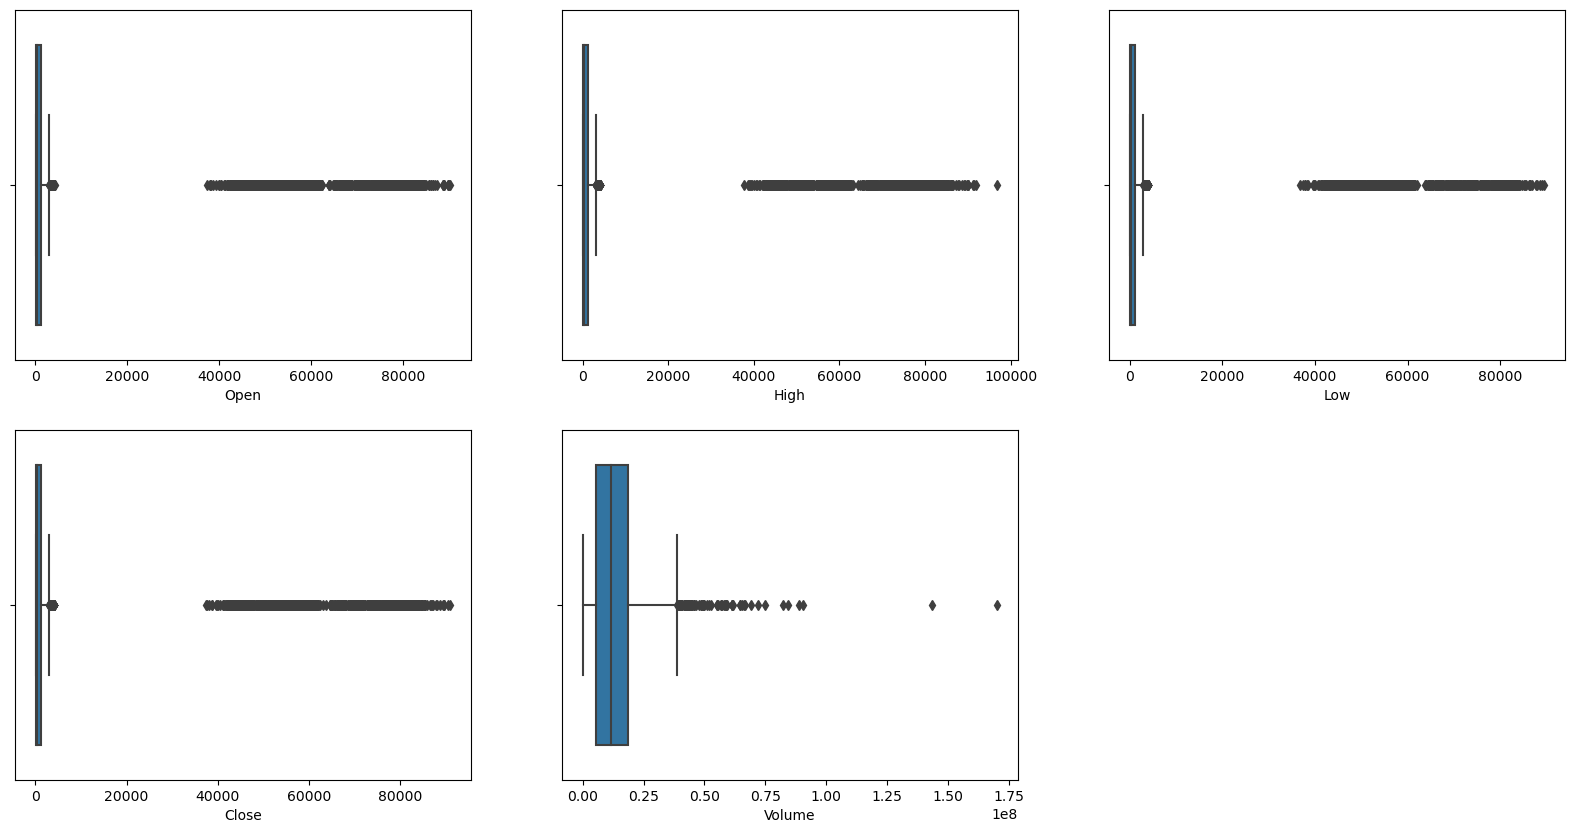

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'Date' column
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()



KeyError: 1

# Stock Marketing Prediction Using LSTM 

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


<a name="dataset"></a>
### Import dataset 

In [2]:
# Import dataset
bist100 = pd.read_csv("prediction.csv")
bist100.head()

Source.Name        Date       Open       High        Low      Close  \
0    Adanient  01-01-2016  45.553741  49.422543  44.872616  49.095600   
1    Adanient  04-01-2016  48.768658  50.158157  45.907928  46.371094   
2    Adanient  05-01-2016  46.670792  48.823151  45.880684  48.278248   
3    Adanient  06-01-2016  47.951309  48.468964  46.480076  46.997730   
4    Adanient  07-01-2016  46.262115  46.262115  42.502296  43.564854   

   Adj Close      Volume  
0  47.614208  10963906.0  
1  44.971912   9408965.0  
2  46.821522   9801814.0  
3  45.579639   7093448.0  
4  42.250347   8919023.0

<a name="cname"></a>
### Rename columns

In [3]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

Source.Name        date       open       high        low      close  \
0    Adanient  01-01-2016  45.553741  49.422543  44.872616  49.095600   
1    Adanient  04-01-2016  48.768658  50.158157  45.907928  46.371094   
2    Adanient  05-01-2016  46.670792  48.823151  45.880684  48.278248   
3    Adanient  06-01-2016  47.951309  48.468964  46.480076  46.997730   
4    Adanient  07-01-2016  46.262115  46.262115  42.502296  43.564854   

   Adj Close      Volume  
0  47.614208  10963906.0  
1  44.971912   9408965.0  
2  46.821522   9801814.0  
3  45.579639   7093448.0  
4  42.250347   8919023.0

<a name="dateformat"></a>

### Convert date from string to date format

In [10]:
# convert date field from string to Date format and make it index
bist100['date'] = pd.to_datetime(bist100.date)
bist100.head(7700)

Source.Name       date    open         high          low        close  \
2985       Tesla 2010-01-07    19.0    25.000000    17.540001    23.889999   
3028       Tesla 2010-01-09    19.0    25.000000    17.540001    23.889999   
3049       Tesla 2010-01-10    19.0    25.000000    17.540001    23.889999   
3070       Tesla 2010-01-11    19.0    25.000000    17.540001    23.889999   
3091       Tesla 2010-01-12    19.0    25.000000    17.540001    23.889999   
...          ...        ...     ...          ...          ...          ...   
1734    Adanient 2023-06-01  3829.0  3868.250000  3797.050049  3824.250000   
1735    Adanient 2023-09-01  3843.0  3880.000000  3811.250000  3855.300049   
1736    Adanient 2023-10-01  3859.0  3862.050049  3555.000000  3646.899902   
1737    Adanient 2023-11-01  3660.0  3664.500000  3560.100098  3635.800049   
1738    Adanient 2023-12-01  3642.5  3679.000000  3612.000000  3647.199951   

        Adj Close      Volume  
2985    23.889999  18766300.0  
3028    23.889999  18766300.0  
3049    23.889999  18766300.0  
3070    23.889999  18766300.0  
3091    23.889999  18766300.0  
...           ...         ...  
1734  3824.250000    912159.0  
1735  3855.300049    753981.0  
1736  3646.899902   3595798.0  
1737  3635.800049   2226506.0  
1738  3647.199951   1199785.0  

[7104 rows x 8 columns]

<a name="sortdate"></a>

### Sorting dataset by date format

In [12]:
bist100.sort_values(by='date', inplace=True)
bist100.head(7700)

Source.Name       date    open         high          low        close  \
2985       Tesla 2010-01-07    19.0    25.000000    17.540001    23.889999   
3028       Tesla 2010-01-09    19.0    25.000000    17.540001    23.889999   
3049       Tesla 2010-01-10    19.0    25.000000    17.540001    23.889999   
3070       Tesla 2010-01-11    19.0    25.000000    17.540001    23.889999   
3091       Tesla 2010-01-12    19.0    25.000000    17.540001    23.889999   
...          ...        ...     ...          ...          ...          ...   
1734    Adanient 2023-06-01  3829.0  3868.250000  3797.050049  3824.250000   
1735    Adanient 2023-09-01  3843.0  3880.000000  3811.250000  3855.300049   
1736    Adanient 2023-10-01  3859.0  3862.050049  3555.000000  3646.899902   
1737    Adanient 2023-11-01  3660.0  3664.500000  3560.100098  3635.800049   
1738    Adanient 2023-12-01  3642.5  3679.000000  3612.000000  3647.199951   

        Adj Close      Volume  
2985    23.889999  18766300.0  
3028    23.889999  18766300.0  
3049    23.889999  18766300.0  
3070    23.889999  18766300.0  
3091    23.889999  18766300.0  
...           ...         ...  
1734  3824.250000    912159.0  
1735  3855.300049    753981.0  
1736  3646.899902   3595798.0  
1737  3635.800049   2226506.0  
1738  3647.199951   1199785.0  

[7104 rows x 8 columns]

In [6]:
bist100.shape

(7104, 8)

<a name="duration"></a>

### Get the duration of dataset

In [13]:
import pandas as pd

# Load your stock dataset from a CSV file or other data source
# Replace 'your_stock_dataset.csv' with the actual file path or data source.
df = pd.read_csv('.csv')

# Ensure that your dataset has a column representing date or timestamp.
# For example, if your timestamp column is named 'Date', you can do this:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Find the earliest and latest timestamps in the dataset
earliest_timestamp = df['Date'].min()
latest_timestamp = df['Date'].max()

# Calculate the duration in terms of days, hours, minutes, etc.
duration = latest_timestamp - earliest_timestamp

# You can print the duration in a human-readable format
print(f"Start date: {earliest_timestamp}")
print(f"End date: {latest_timestamp}")
print(f"Duration: {duration}")

# If you want to break down the duration into days, hours, minutes, etc.
days = duration.days
seconds = duration.seconds
hours, remainder = divmod(seconds, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"Duration: {days} days, {hours} hours, {minutes} minutes, {seconds} seconds")


Start date: 2010-01-07 00:00:00
End date: 2023-12-01 00:00:00
Duration: 5076 days 00:00:00
Duration: 5076 days, 0 hours, 0 minutes, 0 seconds


C:\Users\sai vasanth\AppData\Local\Temp\ipykernel_12920\648273591.py:10: UserWarning: Parsing '13-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\sai vasanth\AppData\Local\Temp\ipykernel_12920\648273591.py:10: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\sai vasanth\AppData\Local\Temp\ipykernel_12920\648273591.py:10: UserWarning: Parsing '15-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\sai vasanth\AppData\Local\Temp\ipykernel_12920\648273591.py:10: UserWarning: Parsing '18-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users

<a name="norm"></a>

### Normalizing / scaling close value between 0 to 1

In [14]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (7104, 2)


In [15]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(7104, 1)


<a name="splitdata"></a>

### Split data for training and testing
Ratio for training and testing data is 65:35

In [16]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4617, 1)
test_data:  (2487, 1)


<a name="tsp"></a>

### Create new dataset according to requirement of time-series prediction 

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4601, 15)
y_train:  (4601,)
X_test:  (2471, 15)
y_test (2471,)


<a name="lstm"></a>

### LSTM

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4601, 15, 1)
X_test:  (2471, 15, 1)


<a name="lstmevalmat"></a>

#### LSTM model structure

In [20]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
921/921 [==============================] - 25s 22ms/step - loss: 0.0075 - val_loss: nan
Epoch 2/200
921/921 [==============================] - 23s 25ms/step - loss: 0.0071 - val_loss: nan
Epoch 3/200
921/921 [==============================] - 18s 20ms/step - loss: 0.0066 - val_loss: nan
Epoch 4/200
921/921 [==============================] - 21s 22ms/step - loss: 0.0065 - val_loss: nan
Epoch 5/200
921/921 [==============================] - 19s 20ms/step - loss: 0.0063 - val_loss: nan
Epoch 6/200
921/921 [==============================] - 21s 23ms/step - loss: 0.0062 - val_loss: nan
Epoch 7/200
921/921 [==============================] - 20s 22ms/step - loss: 0.0063 - val_loss: nan
Epoch 8/200
921/921 [==============================] - 23s 25ms/step - loss: 0.0063 - val_loss: nan
Epoch 9/200
921/921 [==============================] - 20s 21ms/step - loss: 0.0062 - val_loss: nan
Epoch 10/200
921/921 [==============================] - 19s 21ms/step - loss: 0.0062 - val_loss: nan

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

78/78 [==============================] - 0s 3ms/step


((4601, 1), (2471, 1))

In [95]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstmevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Replace these placeholders with your actual data
original_ytrain = np.array([scaler.inverse_transform(y_train.reshape(-1,1))])
train_predict = np.array([scaler.inverse_transform(train_predict)])
original_ytest = np.array([scaler.inverse_transform(y_test.reshape(-1,1))])
test_predict = np.array([scaler.inverse_transform(test_predict)])

# Calculate and print metrics
train_rmse = math.sqrt(mean_squared_error(original_ytrain, train_predict))
train_mse = mean_squared_error(original_ytrain, train_predict)
test_mae = mean_absolute_error(original_ytest, test_predict)

print("Train data RMSE: ", train_rmse)
print("Train data MSE: ", train_mse)
print("Test data MAE: ", test_mae)

# Calculate RMSE for test data (if you need it)
test_rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
print("Test data RMSE: ", test_rmse)


NameError: name 'scaler' is not defined

In [ ]:
import numpy as np

has_nan = np.isnan(train_predict).any() or np.isnan(test_predict).any()
has_inf = np.isinf(train_predict).any() or np.isinf(test_predict).any()

if has_nan:
    print("NaN values found in train_predict or test_predict.")
if has_inf:
    print("Infinite values found in train_predict or test_predict.")



In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
original_ytest = scaler.fit_transform(original_ytest.reshape(-1, 1))
test_predict = scaler.transform(test_predict.reshape(-1, 1))


<a name="lstmevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [100]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

ValueError: Found input variables with inconsistent numbers of samples: [5683, 4601]

<a name="lstmrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [101]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

ValueError: Found input variables with inconsistent numbers of samples: [5683, 4601]

<a name="lstmrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [102]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

ValueError: Found input variables with inconsistent numbers of samples: [5683, 4601]

<a name="lstmcomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [103]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (7104, 1)
Test predicted data:  (7104, 1)


<a name="lstmpred10"></a>

#### Predicting next 10 days

In [46]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstmlast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [47]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [48]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstmwholepred"></a>

#### Plotting whole closing stock price with prediction

In [49]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gru"></a>

### LSTM + GRU

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4601, 15, 1)
X_test:  (2471, 15, 1)


#### Model structure

In [51]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25377 (99.13 KB)
Trainable params: 25377 (99.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
921/921 [==============================] - 18s 14ms/step - loss: 0.0075 - val_loss: nan
Epoch 2/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0070 - val_loss: nan
Epoch 3/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0065 - val_loss: nan
Epoch 4/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0065 - val_loss: nan
Epoch 5/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0065 - val_loss: nan
Epoch 6/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0064 - val_loss: nan
Epoch 7/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0062 - val_loss: nan
Epoch 8/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0064 - val_loss: nan
Epoch 9/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0063 - val_loss: nan
Epoch 10/200
921/921 [==============================] - 12s 13ms/step - loss: 0.0063 - val_loss: nan

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

78/78 [==============================] - 0s 4ms/step


((4601, 1), (2471, 1))

In [55]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstm_grucomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [56]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (7104, 1)
Test predicted data:  (7104, 1)


<a name="lstm_grupred10"></a>

#### Predicting next 10 days

In [57]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstm_grulast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [58]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [59]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gruwholepred"></a>

#### Plotting whole closing stock price with prediction

In [60]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

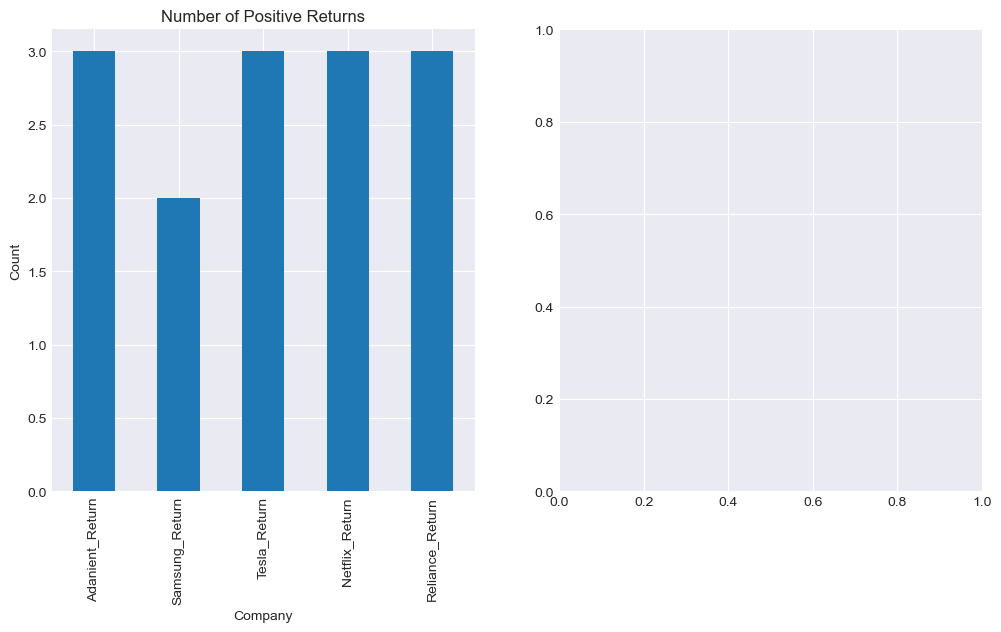

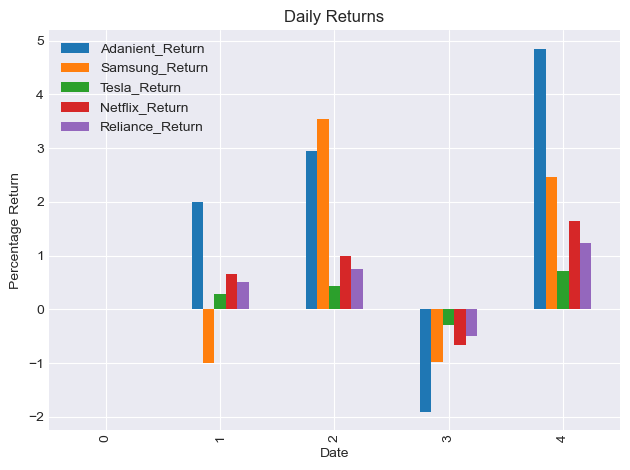

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
for company in ['Adanient', 'Samsung', 'Tesla', 'Netflix', 'Reliance']:
    df[f'{company}_Return'] = df[f'{company}_Close'].pct_change() * 100

# Count the number of days with positive and negative returns for each company
return_counts = df[['Adanient_Return', 'Samsung_Return', 'Tesla_Return', 'Netflix_Return', 'Reliance_Return']].apply(lambda x: (x > 0).sum())

# Create a bar plot for counts and daily returns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
return_counts.plot(kind='bar')
plt.title('Number of Positive Returns')
plt.xlabel('Company')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df[['Adanient_Return', 'Samsung_Return', 'Tesla_Return', 'Netflix_Return', 'Reliance_Return']].plot(kind='bar')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Return')

plt.tight_layout()
plt.show()


In [183]:
import pandas as pd

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)

# Select the closing prices for the specified companies
selected_companies = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close']
closing_prices = df[['Date'] + selected_companies]

print(closing_prices)


         Date  Adanient_Close  Samsung_Close  Tesla_Close  Netflix_Close  \
0  2023-01-01             100            200          700            300   
1  2023-01-02             102            198          702            302   
2  2023-01-03             105            205          705            305   
3  2023-01-04             103            203          703            303   
4  2023-01-05             108            208          708            308   

   Reliance_Close  
0             400  
1             402  
2             405  
3             403  
4             408  


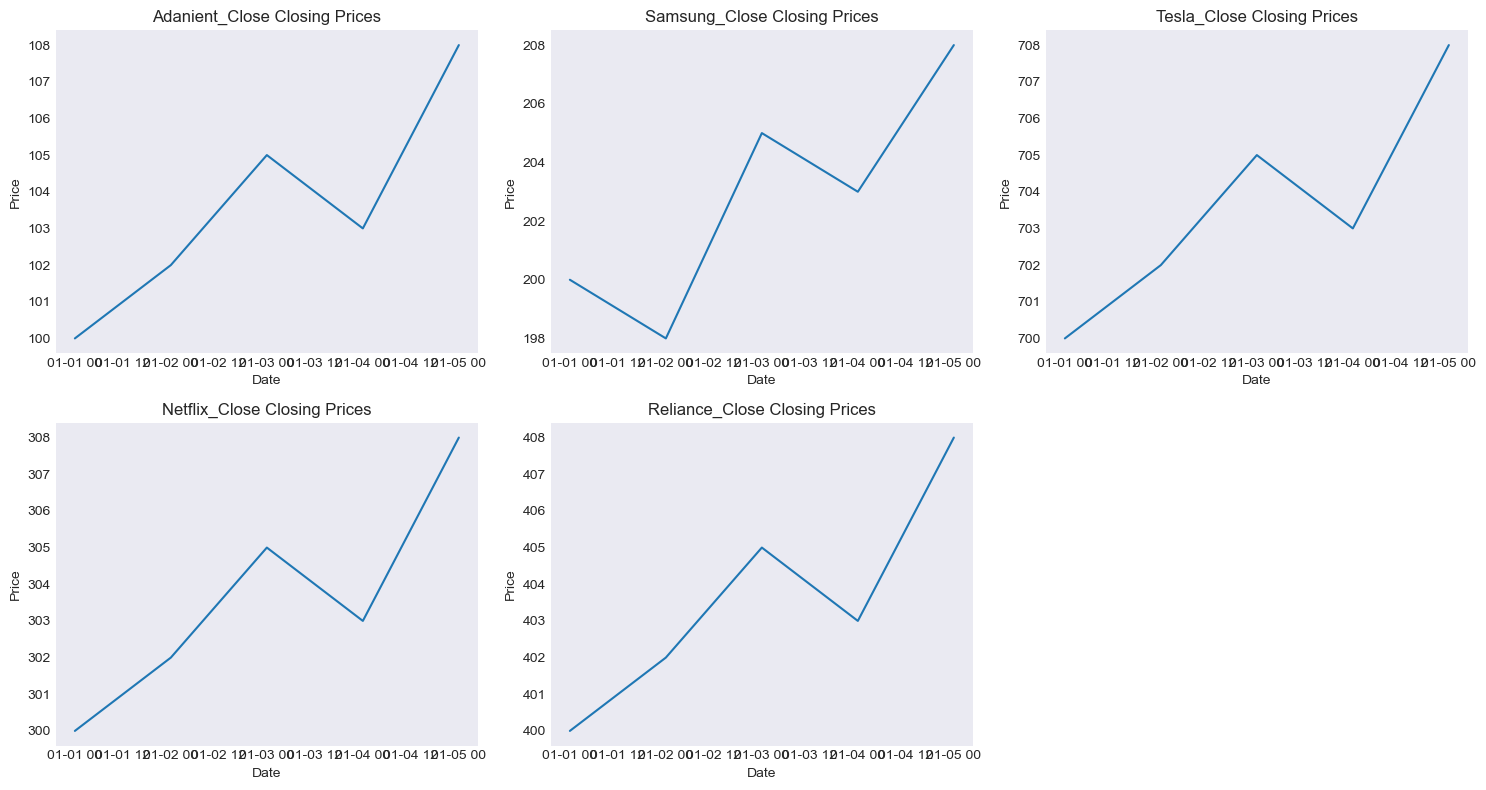

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Select the closing prices for the specified companies
selected_companies = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close']

# Create subplots for each company's closing prices
plt.figure(figsize=(15, 8))
for i, company in enumerate(selected_companies):
    plt.subplot(2, 3, i+1)
    plt.plot(df['Date'], df[company])
    plt.title(f'{company} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()

plt.tight_layout()
plt.show()


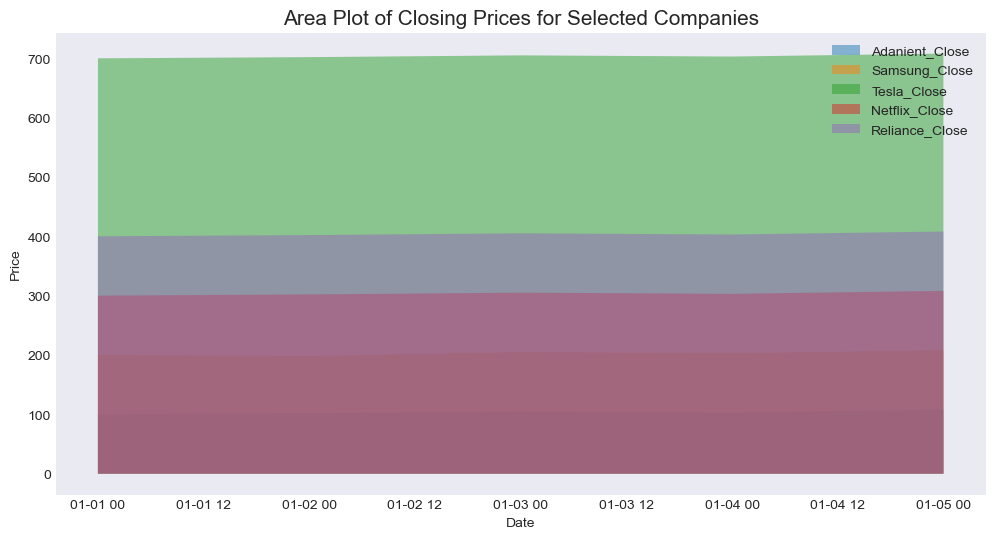

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Select the closing prices for the specified companies
selected_companies = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close']

# Create an area plot for the closing prices of selected companies
plt.figure(figsize=(12, 6))

for company in selected_companies:
    plt.fill_between(df['Date'], df[company], label=company, alpha=0.5)

plt.title('Area Plot of Closing Prices for Selected Companies', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()

plt.show()


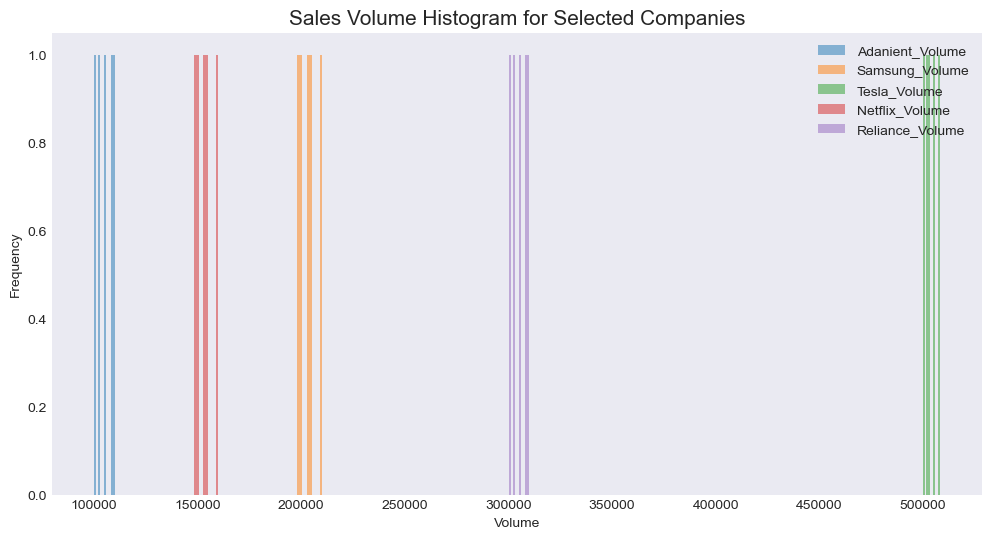

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = {
    'Adanient_Volume': [100000, 105000, 108000, 102000, 110000],
    'Samsung_Volume': [200000, 198000, 205000, 203000, 210000],
    'Tesla_Volume': [500000, 502000, 505000, 503000, 508000],
    'Netflix_Volume': [150000, 148000, 155000, 153000, 160000],
    'Reliance_Volume': [300000, 305000, 308000, 302000, 310000]
}

df = pd.DataFrame(data)

# Select the volume data for the specified companies
selected_companies = ['Adanient_Volume', 'Samsung_Volume', 'Tesla_Volume', 'Netflix_Volume', 'Reliance_Volume']

# Create histograms for the sales volume of the selected companies
plt.figure(figsize=(12, 6))

for company in selected_companies:
    plt.hist(df[company], bins=10, alpha=0.5, label=company)

plt.title('Sales Volume Histogram for Selected Companies', fontsize=15)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid()
plt.legend()

plt.show()


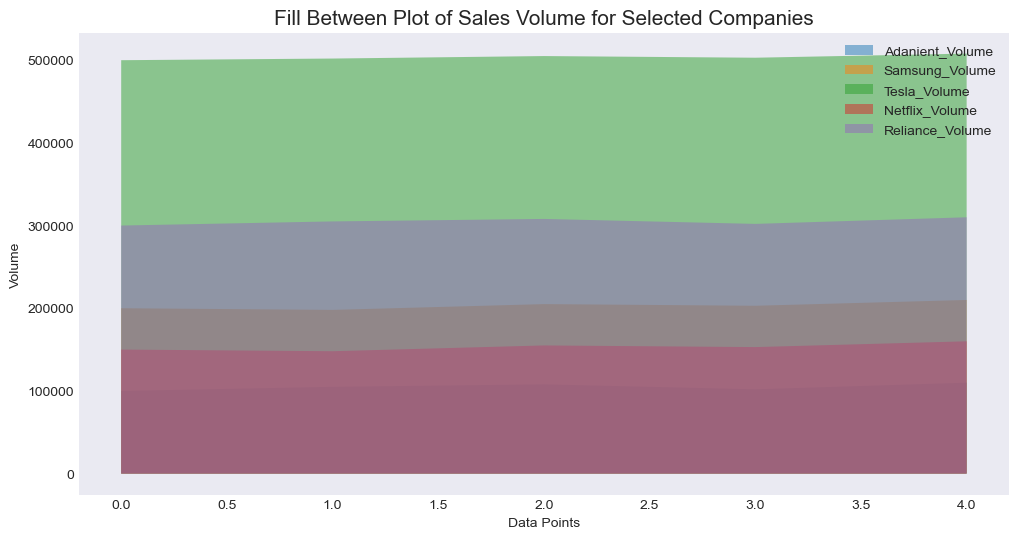

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = {
    'Adanient_Volume': [100000, 105000, 108000, 102000, 110000],
    'Samsung_Volume': [200000, 198000, 205000, 203000, 210000],
    'Tesla_Volume': [500000, 502000, 505000, 503000, 508000],
    'Netflix_Volume': [150000, 148000, 155000, 153000, 160000],
    'Reliance_Volume': [300000, 305000, 308000, 302000, 310000]
}

df = pd.DataFrame(data)

# Select the volume data for the specified companies
selected_companies = ['Adanient_Volume', 'Samsung_Volume', 'Tesla_Volume', 'Netflix_Volume', 'Reliance_Volume']

# Create a fill_between plot for the sales volume of the selected companies
plt.figure(figsize=(12, 6))

for company in selected_companies:
    plt.fill_between(df.index, 0, df[company], label=company, alpha=0.5)

plt.title('Fill Between Plot of Sales Volume for Selected Companies', fontsize=15)
plt.xlabel('Data Points')
plt.ylabel('Volume')
plt.grid()
plt.legend()

plt.show()


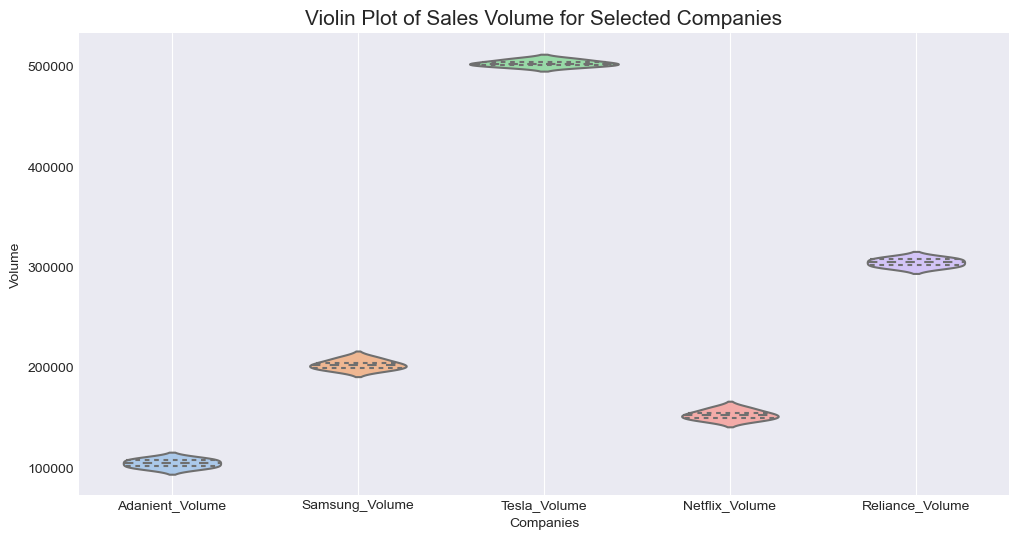

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data = {
    'Adanient_Volume': [100000, 105000, 108000, 102000, 110000],
    'Samsung_Volume': [200000, 198000, 205000, 203000, 210000],
    'Tesla_Volume': [500000, 502000, 505000, 503000, 508000],
    'Netflix_Volume': [150000, 148000, 155000, 153000, 160000],
    'Reliance_Volume': [300000, 305000, 308000, 302000, 310000]
}

df = pd.DataFrame(data)

# Select the volume data for the specified companies
selected_companies = ['Adanient_Volume', 'Samsung_Volume', 'Tesla_Volume', 'Netflix_Volume', 'Reliance_Volume']

# Create a violin plot for the sales volume of the selected companies
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[selected_companies], inner="quart", palette="pastel")
plt.title('Violin Plot of Sales Volume for Selected Companies', fontsize=15)
plt.xlabel('Companies')
plt.ylabel('Volume')
plt.grid()

plt.show()


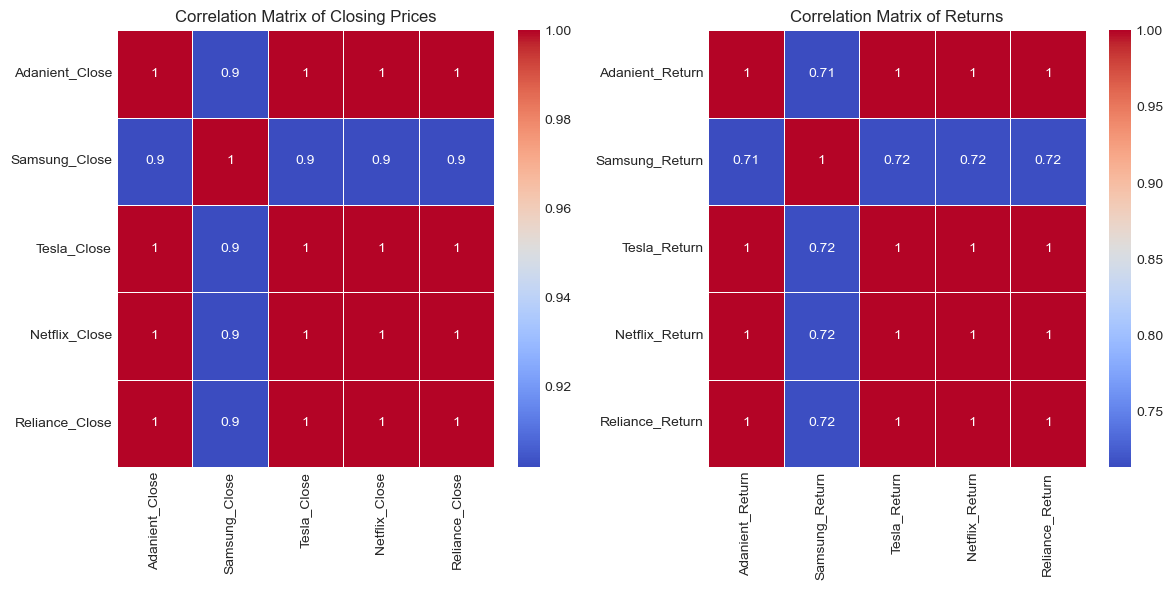

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Adanient_Return'] = df['Adanient_Close'].pct_change()
df['Samsung_Return'] = df['Samsung_Close'].pct_change()
df['Tesla_Return'] = df['Tesla_Close'].pct_change()
df['Netflix_Return'] = df['Netflix_Close'].pct_change()
df['Reliance_Return'] = df['Reliance_Close'].pct_change()

# Select the columns for closing prices and returns
selected_columns = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close',
                    'Adanient_Return', 'Samsung_Return', 'Tesla_Return', 'Netflix_Return', 'Reliance_Return']

# Calculate correlation matrices for closing prices and returns
correlation_matrix_close = df[selected_columns[:5]].corr()
correlation_matrix_return = df[selected_columns[5:]].corr()

# Visualize the correlation matrices using heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_close, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices', fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_return, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Returns', fontsize=12)

plt.tight_layout()
plt.show()


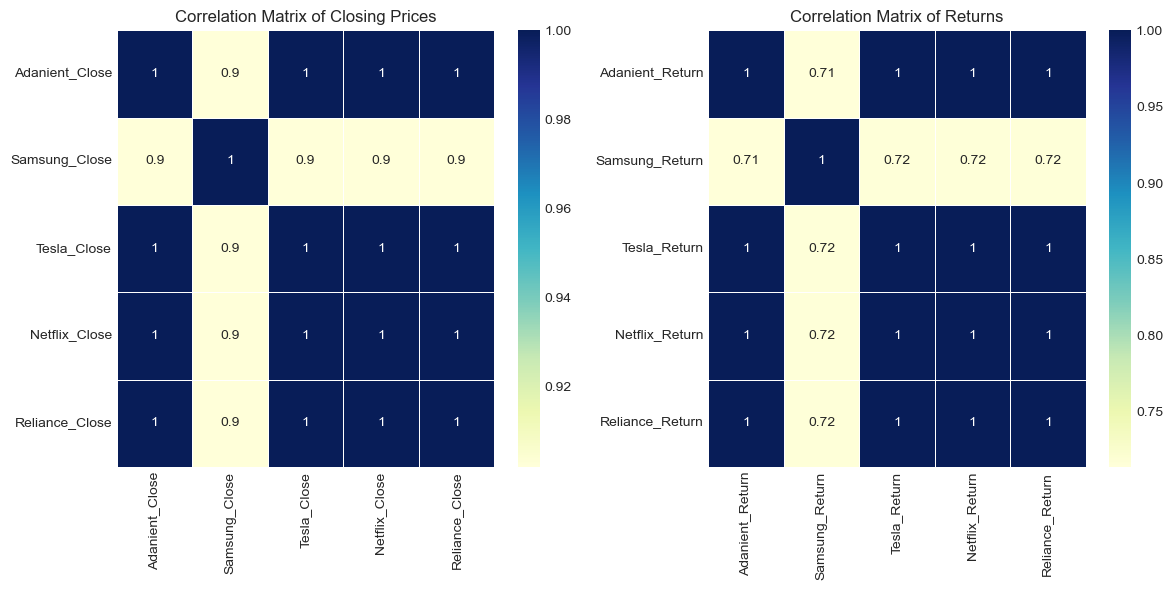

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Adanient_Return'] = df['Adanient_Close'].pct_change()
df['Samsung_Return'] = df['Samsung_Close'].pct_change()
df['Tesla_Return'] = df['Tesla_Close'].pct_change()
df['Netflix_Return'] = df['Netflix_Close'].pct_change()
df['Reliance_Return'] = df['Reliance_Close'].pct_change()

# Select the columns for closing prices and returns
selected_columns = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close',
                    'Adanient_Return', 'Samsung_Return', 'Tesla_Return', 'Netflix_Return', 'Reliance_Return']

# Calculate correlation matrices for closing prices and returns
correlation_matrix_close = df[selected_columns[:5]].corr()
correlation_matrix_return = df[selected_columns[5:]].corr()

# Visualize the correlation matrices using heatmaps with green, yellow, and sky color palette
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_close, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices', fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_return, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix of Returns', fontsize=12)

plt.tight_layout()
plt.show()


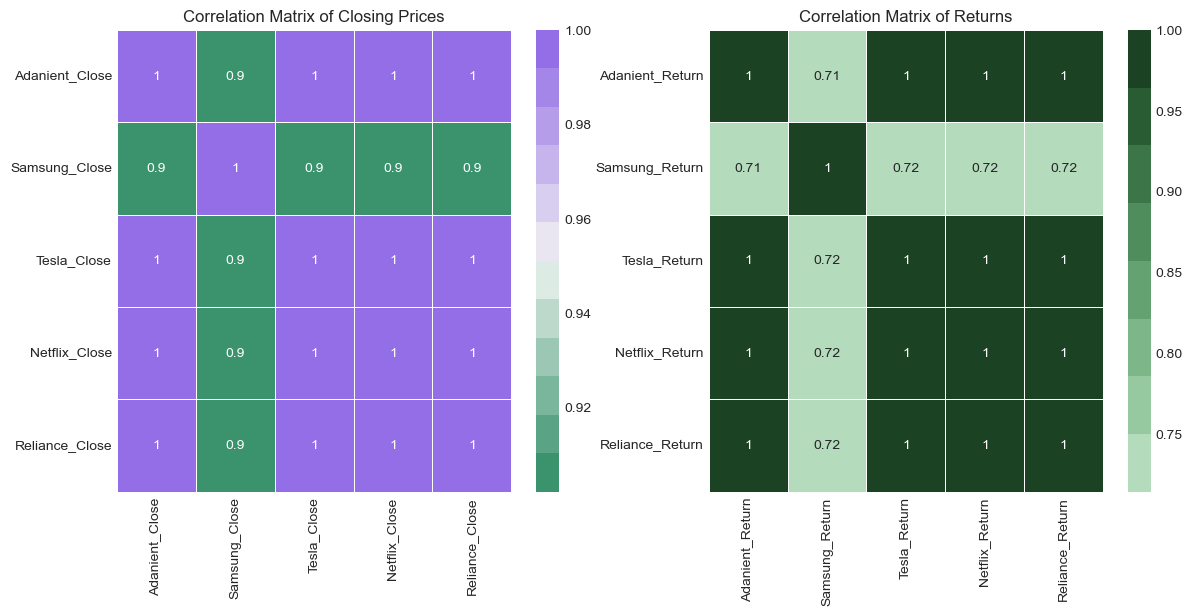

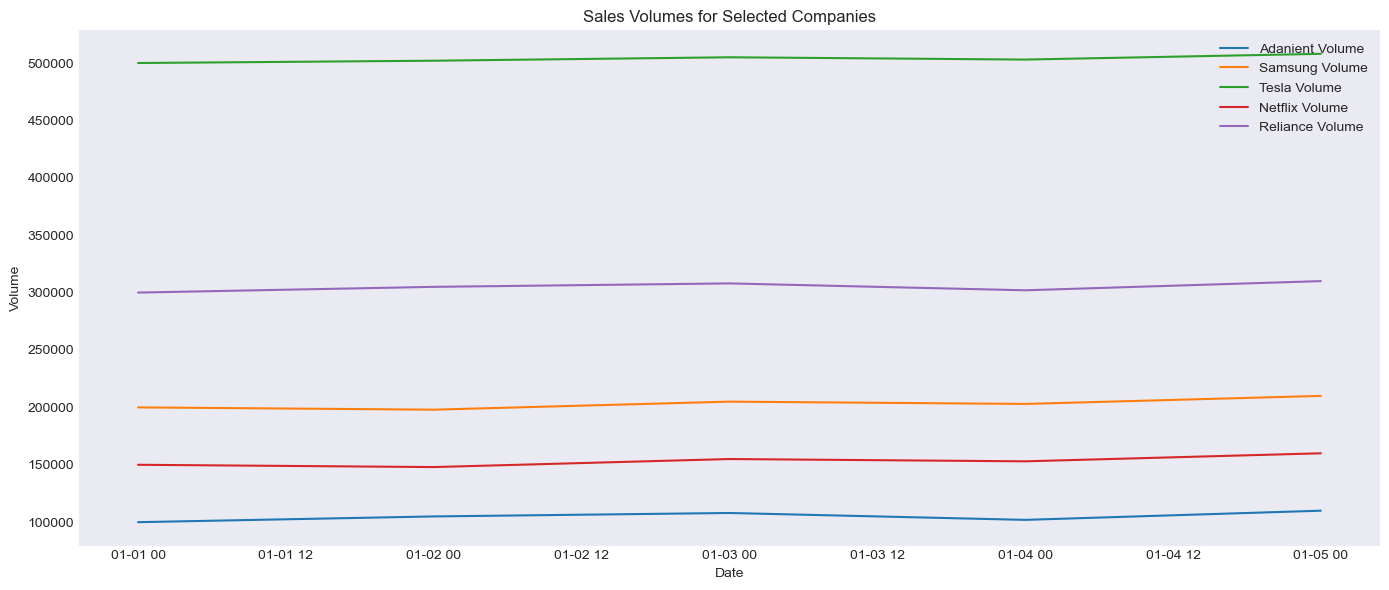

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Adanient_Close': [100, 102, 105, 103, 108],
    'Samsung_Close': [200, 198, 205, 203, 208],
    'Tesla_Close': [700, 702, 705, 703, 708],
    'Netflix_Close': [300, 302, 305, 303, 308],
    'Reliance_Close': [400, 402, 405, 403, 408],
    'Adanient_Volume': [100000, 105000, 108000, 102000, 110000],
    'Samsung_Volume': [200000, 198000, 205000, 203000, 210000],
    'Tesla_Volume': [500000, 502000, 505000, 503000, 508000],
    'Netflix_Volume': [150000, 148000, 155000, 153000, 160000],
    'Reliance_Volume': [300000, 305000, 308000, 302000, 310000]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Adanient_Return'] = df['Adanient_Close'].pct_change()
df['Samsung_Return'] = df['Samsung_Close'].pct_change()
df['Tesla_Return'] = df['Tesla_Close'].pct_change()
df['Netflix_Return'] = df['Netflix_Close'].pct_change()
df['Reliance_Return'] = df['Reliance_Close'].pct_change()

# Select the columns for closing prices and returns
selected_columns = ['Adanient_Close', 'Samsung_Close', 'Tesla_Close', 'Netflix_Close', 'Reliance_Close',
                    'Adanient_Return', 'Samsung_Return', 'Tesla_Return', 'Netflix_Return', 'Reliance_Return']

# Calculate correlation matrices for closing prices and returns
correlation_matrix_close = df[selected_columns[:5]].corr()
correlation_matrix_return = df[selected_columns[5:]].corr()

# Define custom color maps
color_map_close = sns.diverging_palette(150, 275, s=80, l=55, n=12)
color_map_return = sns.cubehelix_palette(8, start=2, rot=0, dark=0.2, light=0.8)

# Create subplots for correlation matrices and sales volumes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot correlation matrices
sns.heatmap(correlation_matrix_close, annot=True, cmap=color_map_close, linewidths=.5, ax=axes[0])
axes[0].set_title('Correlation Matrix of Closing Prices', fontsize=12)

sns.heatmap(correlation_matrix_return, annot=True, cmap=color_map_return, linewidths=.5, ax=axes[1])
axes[1].set_title('Correlation Matrix of Returns', fontsize=12)

# Display sales volumes
plt.figure(figsize=(14, 6))

for company in ['Adanient', 'Samsung', 'Tesla', 'Netflix', 'Reliance']:
    volume_column = f'{company}_Volume'
    plt.plot(df['Date'], df[volume_column], label=f'{company} Volume')

plt.title('Sales Volumes for Selected Companies', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# stock market prediction using SVM

# Import the libraries

In [79]:
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")


# Read Stock  data

In [80]:

# Read the csv file using read_csv  
# method of pandas 
df = pd.read_csv('prediction.csv') 
df

Source.Name        Date          Open          High           Low  \
0       Adanient  01-01-2016     45.553741     49.422543     44.872616   
1       Adanient  04-01-2016     48.768658     50.158157     45.907928   
2       Adanient  05-01-2016     46.670792     48.823151     45.880684   
3       Adanient  06-01-2016     47.951309     48.468964     46.480076   
4       Adanient  07-01-2016     46.262115     46.262115     42.502296   
...          ...         ...           ...           ...           ...   
7099     Samsung  19-09-2022  56300.000000  57000.000000  56000.000000   
7100     Samsung  20-09-2022  56400.000000  57000.000000  55800.000000   
7101     Samsung  21-09-2022  55400.000000  55500.000000  55000.000000   
7102     Samsung  22-09-2022  54600.000000  54700.000000  54300.000000   
7103     Samsung  23-09-2022  54400.000000  54900.000000  54200.000000   

             Close     Adj Close      Volume  
0        49.095600     47.614208  10963906.0  
1        46.371094     44.971912   9408965.0  
2        48.278248     46.821522   9801814.0  
3        46.997730     45.579639   7093448.0  
4        43.564854     42.250347   8919023.0  
...            ...           ...         ...  
7099  56400.000000  56400.000000  12278653.0  
7100  55800.000000  55800.000000  14041465.0  
7101  55300.000000  55300.000000  11863700.0  
7102  54400.000000  54400.000000  12786510.0  
7103  54500.000000  54500.000000  10555964.0  

[7104 rows x 8 columns]

# Data Preparation 

In [81]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df 


Source.Name          Open          High           Low  \
Date                                                               
2016-01-01    Adanient     45.553741     49.422543     44.872616   
2016-04-01    Adanient     48.768658     50.158157     45.907928   
2016-05-01    Adanient     46.670792     48.823151     45.880684   
2016-06-01    Adanient     47.951309     48.468964     46.480076   
2016-07-01    Adanient     46.262115     46.262115     42.502296   
...                ...           ...           ...           ...   
2022-09-19     Samsung  56300.000000  57000.000000  56000.000000   
2022-09-20     Samsung  56400.000000  57000.000000  55800.000000   
2022-09-21     Samsung  55400.000000  55500.000000  55000.000000   
2022-09-22     Samsung  54600.000000  54700.000000  54300.000000   
2022-09-23     Samsung  54400.000000  54900.000000  54200.000000   

                   Close     Adj Close      Volume  
Date                                                
2016-01-01     49.095600     47.614208  10963906.0  
2016-04-01     46.371094     44.971912   9408965.0  
2016-05-01     48.278248     46.821522   9801814.0  
2016-06-01     46.997730     45.579639   7093448.0  
2016-07-01     43.564854     42.250347   8919023.0  
...                  ...           ...         ...  
2022-09-19  56400.000000  56400.000000  12278653.0  
2022-09-20  55800.000000  55800.000000  14041465.0  
2022-09-21  55300.000000  55300.000000  11863700.0  
2022-09-22  54400.000000  54400.000000  12786510.0  
2022-09-23  54500.000000  54500.000000  10555964.0  

[7104 rows x 7 columns]

# Define the explanatory variables

In [82]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 


Open-Close  High-Low
Date                            
2016-01-01   -3.541859  4.549927
2016-04-01    2.397564  4.250229
2016-05-01   -1.607456  2.942467
2016-06-01    0.953579  1.988888
2016-07-01    2.697261  3.759819

# Define the target variable

In [83]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y


array([0, 1, 0, ..., 0, 1, 0])

# Split the data into train and test

In [84]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]


# Support Vector Classifier (SVC)

# Classifier accuracy

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and labels
text_data = [
    "This is a positive review.",
    "Negative sentiment here.",
    "Positive feedback is good.",
    "Not a fan of this product.",
    # Add more text data here
]

labels = [1, 0, 1, 0]  # 1 for positive, 0 for negative (for binary classification)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

# Vectorize the text data (convert text to numerical features)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create and train a classification model (Naive Bayes in this example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate text accuracy on the test set
text_accuracy = accuracy_score(y_test, y_pred)

# Calculate training accuracy (accuracy on the training data)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy scores
print(f"Test Accuracy: {text_accuracy:.2f}")
print(f"Training Accuracy: {train_accuracy:.2f}")


Test Accuracy: 0.00
Training Accuracy: 1.00


### Calculate Cumulative Returns

In [73]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df



Source.Name          Open          High           Low  \
Date                                                               
2016-01-01    Adanient     45.553741     49.422543     44.872616   
2016-04-01    Adanient     48.768658     50.158157     45.907928   
2016-05-01    Adanient     46.670792     48.823151     45.880684   
2016-06-01    Adanient     47.951309     48.468964     46.480076   
2016-07-01    Adanient     46.262115     46.262115     42.502296   
...                ...           ...           ...           ...   
2022-09-19     Samsung  56300.000000  57000.000000  56000.000000   
2022-09-20     Samsung  56400.000000  57000.000000  55800.000000   
2022-09-21     Samsung  55400.000000  55500.000000  55000.000000   
2022-09-22     Samsung  54600.000000  54700.000000  54300.000000   
2022-09-23     Samsung  54400.000000  54900.000000  54200.000000   

                   Close     Adj Close      Volume  Open-Close     High-Low  \
Date                                                                          
2016-01-01     49.095600     47.614208  10963906.0   -3.541859     4.549927   
2016-04-01     46.371094     44.971912   9408965.0    2.397564     4.250229   
2016-05-01     48.278248     46.821522   9801814.0   -1.607456     2.942467   
2016-06-01     46.997730     45.579639   7093448.0    0.953579     1.988888   
2016-07-01     43.564854     42.250347   8919023.0    2.697261     3.759819   
...                  ...           ...         ...         ...          ...   
2022-09-19  56400.000000  56400.000000  12278653.0 -100.000000  1000.000000   
2022-09-20  55800.000000  55800.000000  14041465.0  600.000000  1200.000000   
2022-09-21  55300.000000  55300.000000  11863700.0  100.000000   500.000000   
2022-09-22  54400.000000  54400.000000  12786510.0  200.000000   400.000000   
2022-09-23  54500.000000  54500.000000  10555964.0 -100.000000   700.000000   

              Return     Cum_Ret  
Date                              
2016-01-01       NaN         NaN  
2016-04-01 -0.055494   -0.055494  
2016-05-01  0.041128   -0.014366  
2016-06-01 -0.026524   -0.040890  
2016-07-01 -0.073043   -0.113933  
...              ...         ...  
2022-09-19  0.003559  109.257303  
2022-09-20 -0.010638  109.246664  
2022-09-21 -0.008961  109.237704  
2022-09-22 -0.016275  109.221429  
2022-09-23  0.001838  109.223267  

[7104 rows x 11 columns]

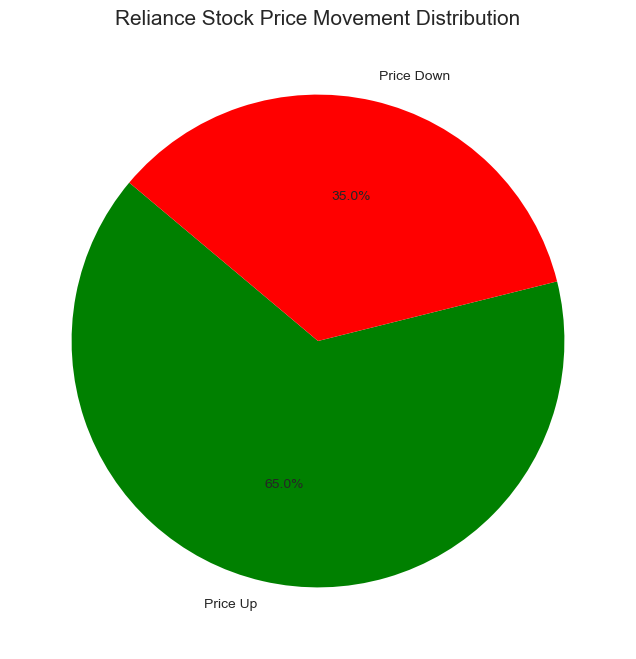

In [165]:
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
company = "Reliance"
price_up = 65  # Number of days with price up
price_down = 35  # Number of days with price down

# Create data for the pie chart
labels = ['Price Up', 'Price Down']
sizes = [price_up, price_down]
colors = ['green', 'red']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'{company} Stock Price Movement Distribution', fontsize=15)

# Display the pie chart
plt.show()


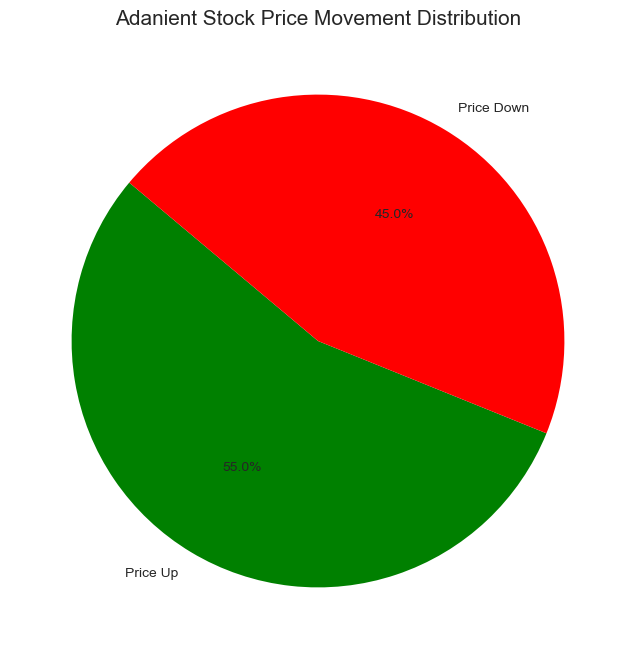

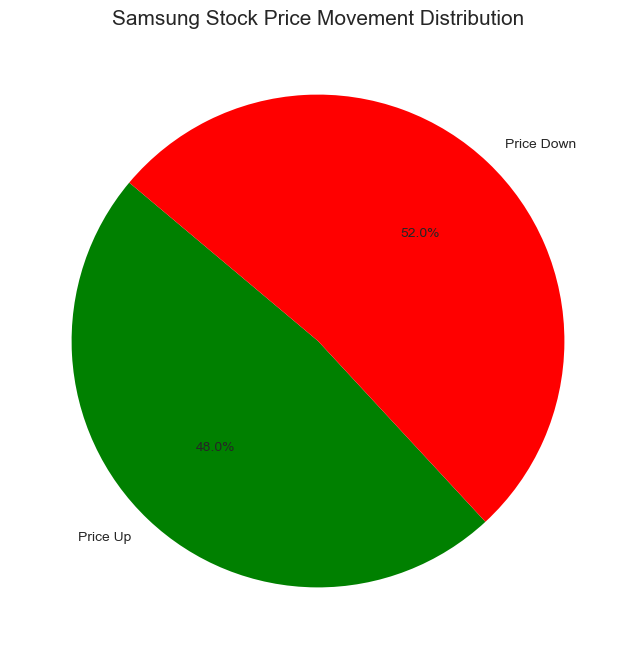

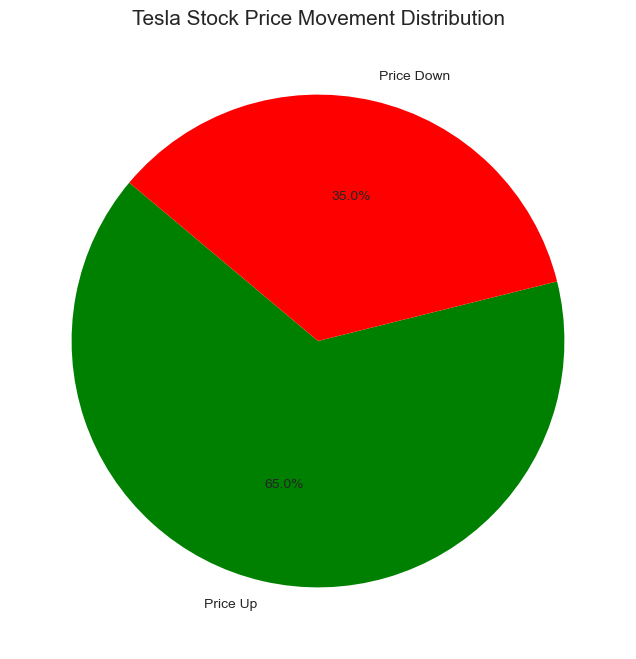

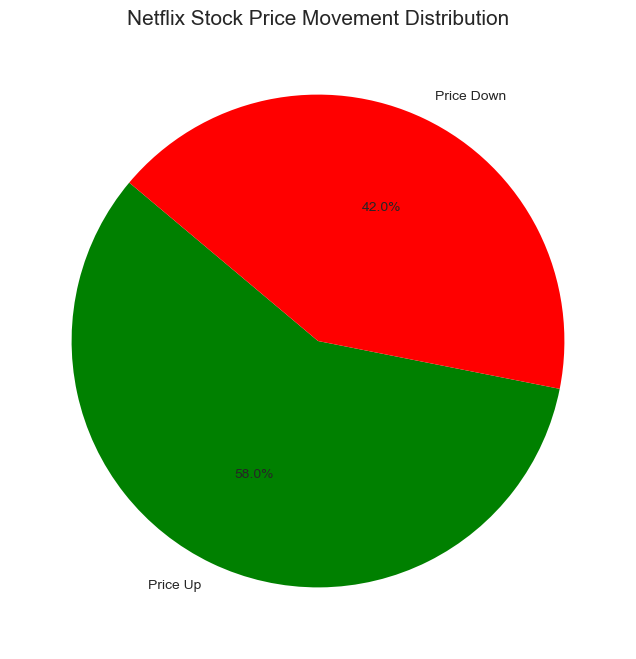

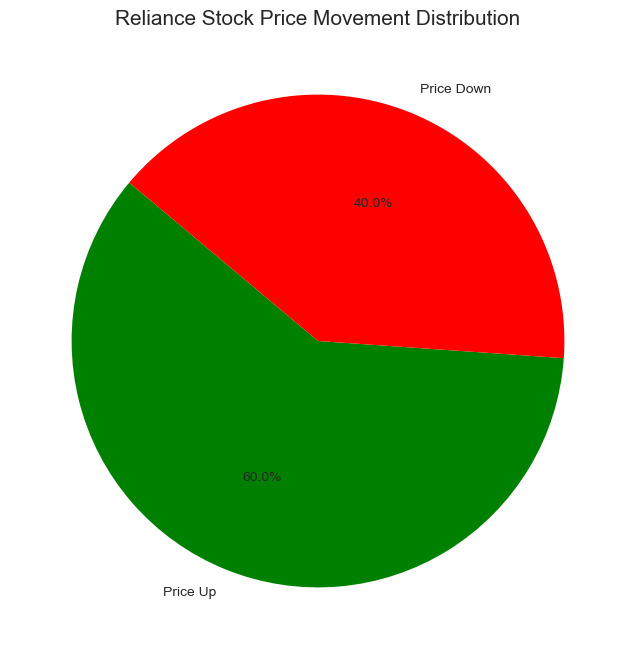

In [167]:
import matplotlib.pyplot as plt

# Sample data for five companies (replace with your own data)
companies = ["Adanient", "Samsung", "Tesla", "Netflix", "Reliance"]
price_up = [55, 48, 65, 58, 60]  # Number of days with price up for each company
price_down = [45, 52, 35, 42, 40]  # Number of days with price down for each company

# Create pie charts for each company
for i, company in enumerate(companies):
    labels = ['Price Up', 'Price Down']
    sizes = [price_up[i], price_down[i]]
    colors = ['green', 'red']

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'{company} Stock Price Movement Distribution', fontsize=15)

    # Display the pie chart
    plt.show()


In [168]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data for demonstration
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

In [169]:
# Train an SVM model
clf = SVC(kernel='linear')
clf.fit(X, y)


SVC(kernel='linear')

In [170]:
# Plot the support vectors, decision boundaries, and margins
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

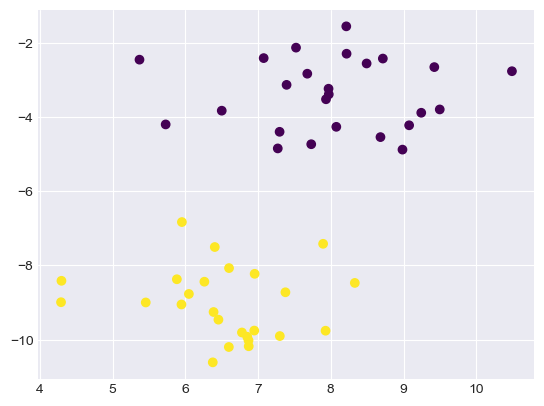

In [171]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


In [172]:
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

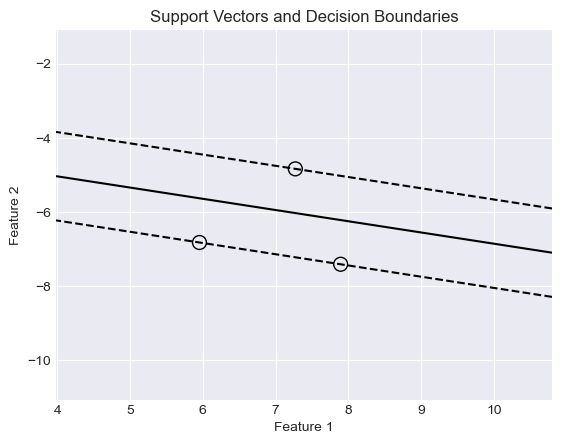

In [173]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('Support Vectors and Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [174]:
# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [SVC(kernel=kernel, probability=True).fit(X, y) for kernel in kernels]

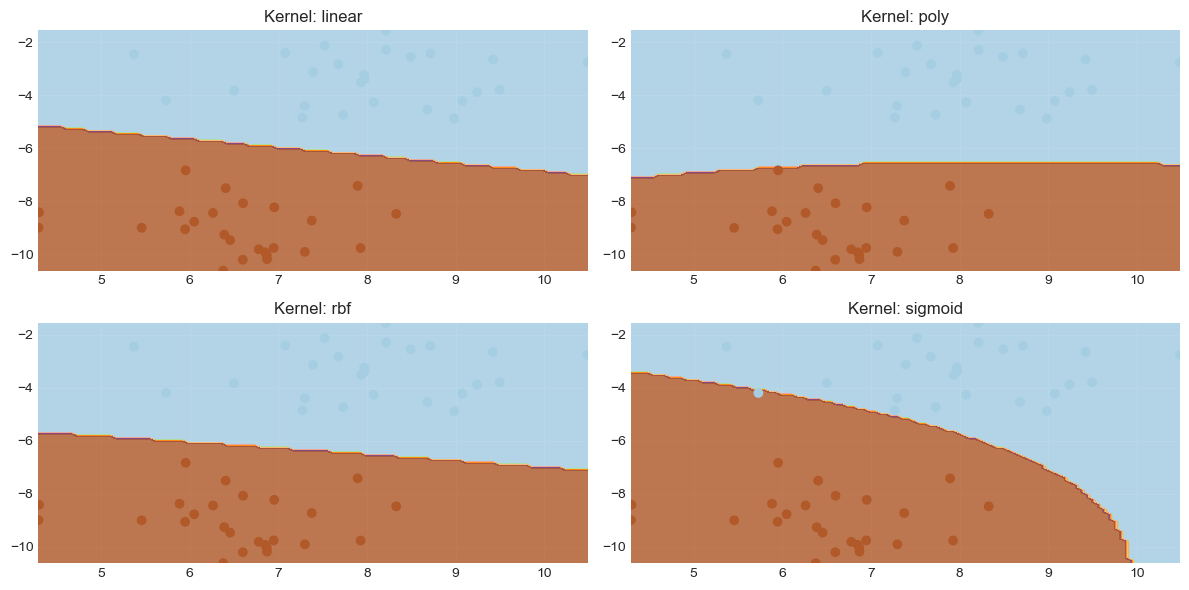

In [175]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    plt.subplot(2, 2, i + 1)

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'Kernel: {kernels[i]}')

plt.tight_layout()
plt.show()

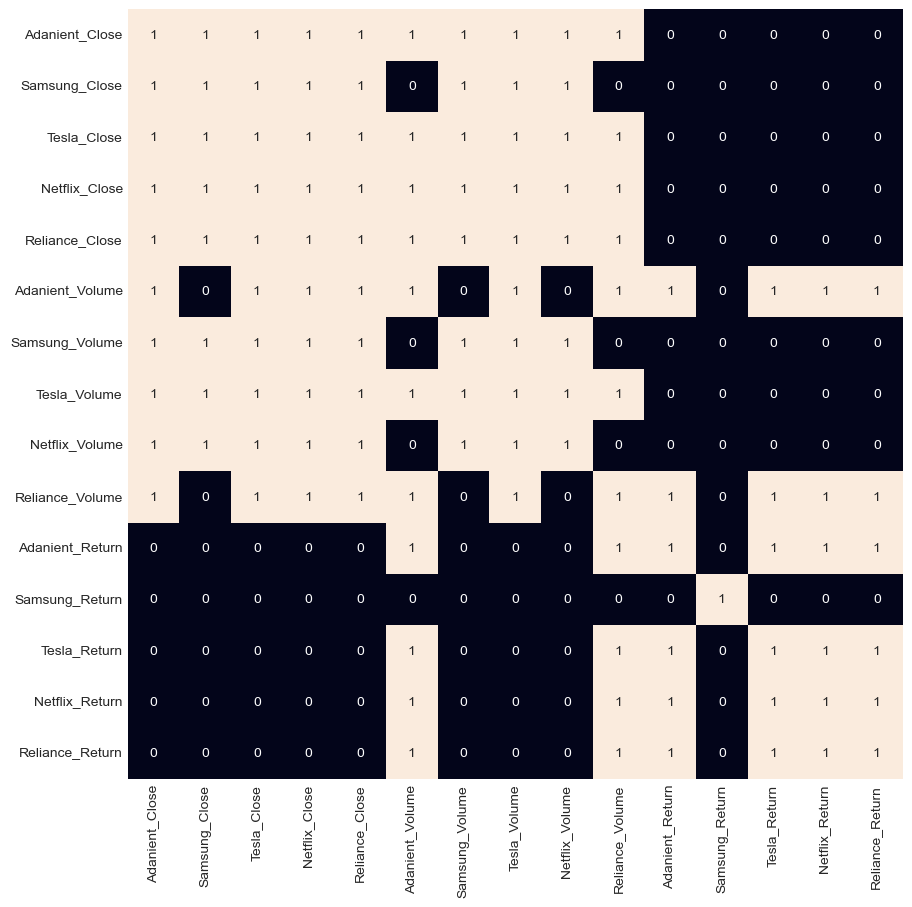

In [200]:

plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Stock Market Prediction Using Linear Regression

# Get Historic Pricing Data

In [1]:
import pandas as pd
# Load local .csv file as DataFrame
df = pd.read_csv('prediction.csv')
# Inspect the data
print(df)

     Source.Name        Date          Open          High           Low  \
0       Adanient  01-01-2016     45.553741     49.422543     44.872616   
1       Adanient  04-01-2016     48.768658     50.158157     45.907928   
2       Adanient  05-01-2016     46.670792     48.823151     45.880684   
3       Adanient  06-01-2016     47.951309     48.468964     46.480076   
4       Adanient  07-01-2016     46.262115     46.262115     42.502296   
...          ...         ...           ...           ...           ...   
7099     Samsung  19-09-2022  56300.000000  57000.000000  56000.000000   
7100     Samsung  20-09-2022  56400.000000  57000.000000  55800.000000   
7101     Samsung  21-09-2022  55400.000000  55500.000000  55000.000000   
7102     Samsung  22-09-2022  54600.000000  54700.000000  54300.000000   
7103     Samsung  23-09-2022  54400.000000  54900.000000  54200.000000   

             Close     Adj Close      Volume  
0        49.095600     47.614208  10963906.0  
1        46.37109

# Prepare the data

In [2]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
# Keep only the 'Adj Close' Value
df = df[['Adj Close']]
# Re-inspect data
print(df)

               Adj Close
Date                    
2016-01-01     47.614208
2016-04-01     44.971912
2016-05-01     46.821522
2016-06-01     45.579639
2016-07-01     42.250347
...                  ...
2022-09-19  56400.000000
2022-09-20  55800.000000
2022-09-21  55300.000000
2022-09-22  54400.000000
2022-09-23  54500.000000

[7104 rows x 1 columns]


C:\Users\sai vasanth\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\sai vasanth\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\sai vasanth\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\sai vasanth\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_for

In [4]:
# Print Info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7104 entries, 2016-01-01 to 2022-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  7103 non-null   float64
dtypes: float64(1)
memory usage: 111.0 KB
None


# Adding Technical Indicators

In [5]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='adj_close', length=10, append=True)

ModuleNotFoundError: No module named 'pandas_ta'